In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [90]:
df =pd.read_csv("/content/drive/MyDrive/SEM-5/ML/Evals/Eval2/winequality-red.csv")

In [91]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [93]:
df.shape

(1599, 12)

In [94]:
df.size

19188

In [95]:
df.ndim

2

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [97]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [98]:
df.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
7.2            0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
9.3            0.360             0.39         1.5             0.080      41.0                 55.0                  0.99652  3.47  0.73       10.9     6          3
                     

In [99]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [100]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Inference:**
From this we can say that there are no null values in the dataset

In [101]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [102]:
print("Dulpicated values:",df.duplicated().sum())

Dulpicated values: 240


In [103]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

**Inference:**Removed duplicated values successfully

# **Data visualisation**

In [104]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

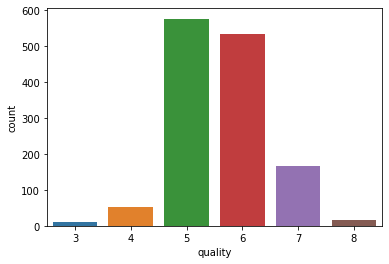

In [105]:
sns.countplot(x = 'quality',data = df)
plt.show()

In [106]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [107]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [108]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [109]:
df['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

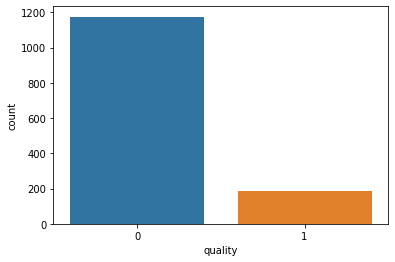

In [110]:
sns.countplot(df['quality'])
plt.show()

In [111]:
X = df.drop('quality',axis=1)
y = df['quality']

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [113]:
y_train.value_counts()

0    941
1    146
Name: quality, dtype: int64

In [114]:
y_test.value_counts()


0    234
1     38
Name: quality, dtype: int64

# **Feature Scaling**

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [116]:
model = []                                                                      # Model names
accuracy = []  

In [117]:
from sklearn.linear_model import LogisticRegression                             # train a logistic regression model on the training set
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report

LogReg = LogisticRegression(random_state=2)                                     # instantiate model
LogReg.fit(X_train,y_train)                                                     # fit model
predicted_values = LogReg.predict(X_test)                                       # make class predictions for the testing set
x = metrics.accuracy_score(y_test, predicted_values)
model.append('Logistic Regression')
accuracy.append(x*100)
print(classification_report(y_test, predicted_values))
print("Logistic Regression's Accuracy is: ", x*100)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       234
           1       0.64      0.37      0.47        38

    accuracy                           0.88       272
   macro avg       0.77      0.67      0.70       272
weighted avg       0.87      0.88      0.87       272

Logistic Regression's Accuracy is:  88.23529411764706


In [118]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DecisionTree.fit(X_train, y_train)
predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
model.append('Decision Tree')
accuracy.append(x*100)
print(classification_report(y_test, predicted_values))
print("Decision Trees Accuracy is: ", x*100)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       234
           1       0.53      0.21      0.30        38

    accuracy                           0.86       272
   macro avg       0.71      0.59      0.61       272
weighted avg       0.83      0.86      0.84       272

Decision Trees Accuracy is:  86.39705882352942


In [119]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)
predicted_values = RF.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
accuracy.append(x*100)
model.append('Random Forest')
print(classification_report(y_test,predicted_values))
print("RF's Accuracy is: ", x*100)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       234
           1       0.48      0.26      0.34        38

    accuracy                           0.86       272
   macro avg       0.68      0.61      0.63       272
weighted avg       0.83      0.86      0.84       272

RF's Accuracy is:  85.66176470588235


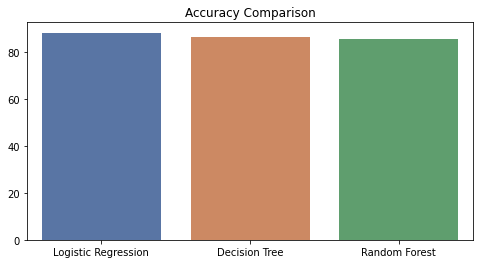

In [120]:
plt.figure(figsize=(8,4))
plt.title('Accuracy Comparison')
sns.barplot(x=model, y=accuracy, palette='deep')

In [121]:
y_predicted = RF.predict(X_test)

In [122]:
print('True:', y_test[0:25])                                                    # print the first 25 true and predicted responses
print('Pred:', y_predicted[0:25])

True: 397     0
1071    0
440     1
219     0
613     0
896     1
935     0
30      0
804     0
263     0
1107    1
1503    0
412     0
344     0
687     0
1034    0
1248    0
621     0
1190    0
602     0
192     0
12      0
1400    0
858     1
414     0
Name: quality, dtype: int64
Pred: [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [123]:
from sklearn.metrics import confusion_matrix                                    
cm = confusion_matrix(y_test,y_predicted)                                       
cm                                                                              

array([[223,  11],
       [ 28,  10]])

Text(42.0, 0.5, 'Truth')

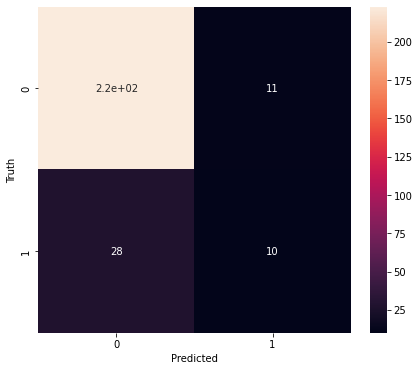

In [124]:
plt.figure(figsize = (7,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Observation:**
- In above matrix, X axis contains `predicted values`, and Y axis contains `actual values`. 
- Each value of matrix show the number of times predicted value matched with actual value.